# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## Contents <a id ="Content" > </a>

## Introduction <a id = 'Introduction'></a>

## Imports <a id="Imports"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import os
#from sklearn.dummy import DummyRegressor
#from imblearn.over_sampling import SMOTE

In [2]:
ccattr_data = pd.read_csv("../data/3.ccattr_data_EDA_final.csv")

In [3]:
ccattr_data.dtypes

CLIENTNUM                     int64
Attrition_Numeric             int64
Customer_Age                  int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Avg_Utilization_Ratio       float64
Gender                       object
Dependent_count               int64
Education_Level_sorted       object
Marital_Status_sorted        object
Income_Category_sorted       object
Card_Category_sorted         object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
naive_cls1                  float64
naive_cls2                  float64
dtype: object

In [4]:
ccattr_data.shape

(10127, 19)

In [5]:
ccattr_data.head().T

,0,1,2,3,4
CLIENTNUM,714648933,717628608,711777633,716645883,708217758
Attrition_Numeric,0,0,0,0,0
Customer_Age,55,37,41,47,63
Credit_Limit,4861.0,2576.0,5784.0,13867.0,14035.0
Total_Revolving_Bal,1123,1640,0,0,2061
Total_Trans_Amt,1556,2568,4173,4297,1606
Avg_Utilization_Ratio,0.231,0.637,0.0,0.0,0.147
Gender,F,M,M,M,M
Dependent_count,3,3,3,2,2
Education_Level_sorted,Graduate,Graduate,Graduate,Graduate,Graduate


In [6]:
ccattr_data.dtypes

CLIENTNUM                     int64
Attrition_Numeric             int64
Customer_Age                  int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Avg_Utilization_Ratio       float64
Gender                       object
Dependent_count               int64
Education_Level_sorted       object
Marital_Status_sorted        object
Income_Category_sorted       object
Card_Category_sorted         object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
naive_cls1                  float64
naive_cls2                  float64
dtype: object

In [7]:
# Label Encode categorical variables 

marital_status = {'Married':1,'Single':2, 'Divorced':3}
ccattr_data['Marital_Status_sorted']=ccattr_data['Marital_Status_sorted'].map(marital_status)


education = {'Uneducated':1,'High School':2, 'Graduate':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6}
ccattr_data['Education_Level_sorted']=ccattr_data['Education_Level_sorted'].map(education)

income = {'0K - 40K':1,'40k − 60K':2, '80K - 120K':3, '60K - 80K':4, '120K +':5}
ccattr_data['Income_Category_sorted']=ccattr_data['Income_Category_sorted'].map(income)

In [8]:
#Checking that no column has missing values 
ccattr_data.isnull().sum()

CLIENTNUM                   0
Attrition_Numeric           0
Customer_Age                0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Avg_Utilization_Ratio       0
Gender                      0
Dependent_count             0
Education_Level_sorted      0
Marital_Status_sorted       0
Income_Category_sorted      0
Card_Category_sorted        0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
naive_cls1                  0
naive_cls2                  0
dtype: int64

In [9]:
## Converting the data type of categorical features to 'category'

cat_cols = ['Attrition_Numeric','Gender', 'Education_Level_sorted', 'Marital_Status_sorted', 'Income_Category_sorted', 'Card_Category_sorted','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']

ccattr_data[cat_cols] = ccattr_data[cat_cols].astype('category')
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Numeric         10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Credit_Limit              10127 non-null  float64 
 4   Total_Revolving_Bal       10127 non-null  int64   
 5   Total_Trans_Amt           10127 non-null  int64   
 6   Avg_Utilization_Ratio     10127 non-null  float64 
 7   Gender                    10127 non-null  category
 8   Dependent_count           10127 non-null  category
 9   Education_Level_sorted    10127 non-null  category
 10  Marital_Status_sorted     10127 non-null  category
 11  Income_Category_sorted    10127 non-null  category
 12  Card_Category_sorted      10127 non-null  category
 13  Months_on_book            10127 non-null  int6

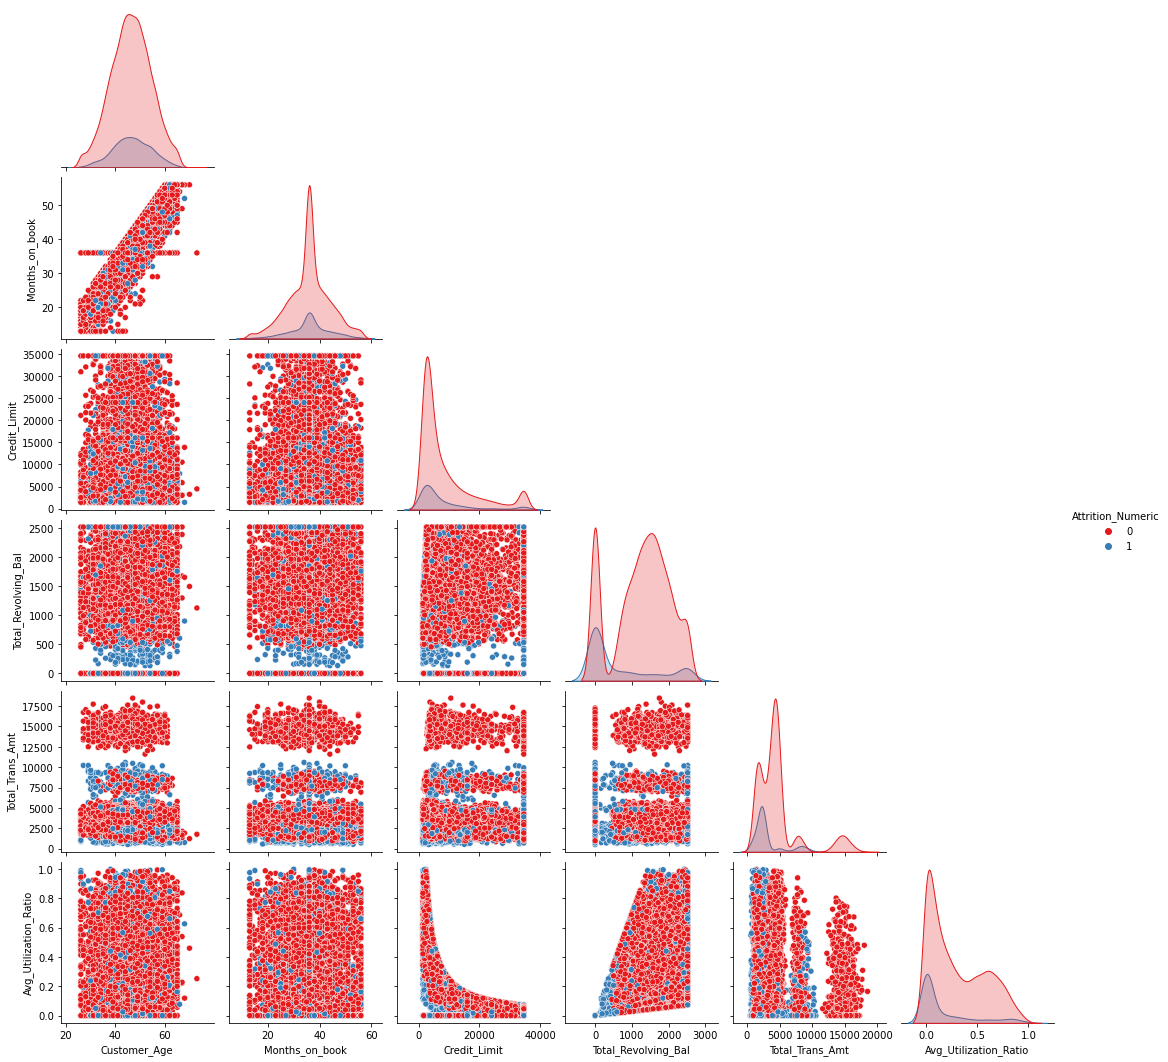

In [10]:
#Corralation

list_cols = ['Attrition_Numeric','Customer_Age','Dependent_count', 'Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
              'Total_Trans_Amt','Avg_Utilization_Ratio']
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(ccattr_data[list_cols], hue="Attrition_Numeric",corner=True)
plt.show()

Looking at the plot it is evident that classifiers are the best models than the linear regressor.

## Pre-Processing

In [11]:
# Creating X and y
X = ccattr_data.drop(['Attrition_Numeric','CLIENTNUM','naive_cls1','naive_cls2'],axis=1)
y = ccattr_data['Attrition_Numeric']

In [12]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
0,55,4861.0,1123,1556,0.231,36,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,37,2576.0,1640,2568,0.637,29,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,41,5784.0,0,4173,0.000,27,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,47,13867.0,0,4297,0.000,36,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,63,14035.0,2061,1606,0.147,49,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
X.describe()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,8631.953698,1162.814061,4404.086304,0.274894,35.928409,0.470919,0.181495,0.262170,0.269774,...,0.379777,0.042954,0.017577,0.012244,0.148020,0.318653,0.333761,0.137454,0.017379,0.005332
std,8.016814,9088.776650,814.987335,3397.129254,0.275691,7.986416,0.499178,0.385447,0.439837,0.443864,...,0.485355,0.202765,0.131414,0.109981,0.355137,0.465977,0.471579,0.344343,0.130686,0.072831
min,26.000000,1438.300000,0.000000,510.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,2555.000000,359.000000,2155.500000,0.023000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,4549.000000,1276.000000,3899.000000,0.176000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,11067.500000,1784.000000,4741.000000,0.503000,40.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,73.000000,34516.000000,2517.000000,18484.000000,0.999000,56.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
X.dtypes

Customer_Age                       int64
Credit_Limit                     float64
Total_Revolving_Bal                int64
Total_Trans_Amt                    int64
Avg_Utilization_Ratio            float64
Months_on_book                     int64
Gender_M                           uint8
Dependent_count_1                  uint8
Dependent_count_2                  uint8
Dependent_count_3                  uint8
Dependent_count_4                  uint8
Dependent_count_5                  uint8
Education_Level_sorted_2           uint8
Education_Level_sorted_3           uint8
Education_Level_sorted_4           uint8
Education_Level_sorted_5           uint8
Education_Level_sorted_6           uint8
Marital_Status_sorted_2            uint8
Marital_Status_sorted_3            uint8
Income_Category_sorted_2           uint8
Income_Category_sorted_3           uint8
Income_Category_sorted_4           uint8
Income_Category_sorted_5           uint8
Card_Category_sorted_Gold          uint8
Card_Category_so

All of the data are Numeric and ready for scaling

## Train Test Split <a id=Train_Test_Split></a>

In [15]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((7088, 43), (3039, 43))

In [16]:
y_train.shape, y_test.shape

((7088,), (3039,))

In [17]:
X_trained_df = X_train.copy()
X_test_df = X_test.copy()

In [18]:
X_trained_df.head()

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
4410,42,30117.0,2129,7930,0.071,36,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4930,42,3964.0,1218,4580,0.307,31,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1335,46,1912.0,1172,4841,0.613,37,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6267,36,14304.0,699,4746,0.049,36,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2413,59,4241.0,0,1798,0.000,53,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Applying Scaling, found best from EDA

In [19]:
#zScore scaling for Customer_Age,Months_on_book
#zScore scaling function
def calczScore(ccdf,col_name):
    df =ccdf.copy()
    col_mean = df[col_name].mean()
    col_std = df[col_name].std(ddof=0)
    df[col_name] = (df[col_name]-col_mean)/col_std
    return df

In [20]:
zScoreCol={"Customer_Age","Months_on_book"}
for col in zScoreCol:
    X_trained_df[col] = calczScore( X_trained_df,col)

In [21]:
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
4410,-0.536671,30117.0,2129,7930,0.071,-0.536671,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4930,-0.536671,3964.0,1218,4580,0.307,-0.536671,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1335,-0.038008,1912.0,1172,4841,0.613,-0.038008,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6267,-1.284665,14304.0,699,4746,0.049,-1.284665,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2413,1.582646,4241.0,0,1798,0.000,1.582646,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,4043.0,2517,2600,0.623,-1.035334,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9425,-1.907994,4712.0,955,2568,0.203,-1.907994,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9816,-0.910668,34516.0,796,7721,0.023,-0.910668,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1890,0.086657,14241.0,2081,1581,0.146,0.086657,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
#Applying zScore on x_test
zScoreCol={"Customer_Age","Months_on_book"}
for col in zScoreCol:
    X_test_df[col] = calczScore(X_test_df,col)

In [23]:
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
7500,0.202997,3594.0,1996,14881,0.555,0.202997,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1238,-2.170683,5988.0,660,10211,0.110,-2.170683,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8327,-2.045753,3450.0,2517,2545,0.730,-2.045753,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
682,0.327927,18584.0,2517,1330,0.135,0.327927,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1791,-2.545475,1612.0,835,2148,0.518,-2.545475,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,5826.0,0,3756,0.000,-0.296725,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3728,0.702719,9137.0,1729,4626,0.189,0.702719,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9122,0.327927,1993.0,0,4075,0.000,0.327927,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6710,-0.171795,7231.0,1047,15571,0.145,-0.171795,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# applying div median on Total_Revolving_Bal
col_median = X_trained_df['Total_Revolving_Bal'].median()
X_trained_df['Total_Revolving_Bal'] = X_trained_df['Total_Revolving_Bal']/col_median   
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
4410,-0.536671,30117.0,1.672427,7930,0.071,-0.536671,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4930,-0.536671,3964.0,0.956795,4580,0.307,-0.536671,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1335,-0.038008,1912.0,0.920660,4841,0.613,-0.038008,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6267,-1.284665,14304.0,0.549097,4746,0.049,-1.284665,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2413,1.582646,4241.0,0.000000,1798,0.000,1.582646,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,4043.0,1.977219,2600,0.623,-1.035334,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9425,-1.907994,4712.0,0.750196,2568,0.203,-1.907994,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9816,-0.910668,34516.0,0.625295,7721,0.023,-0.910668,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1890,0.086657,14241.0,1.634721,1581,0.146,0.086657,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# applying div median on Total_Revolving_Bal for x_test
col_median = X_test_df['Total_Revolving_Bal'].median()
X_test_df['Total_Revolving_Bal'] = X_test_df['Total_Revolving_Bal']/col_median   
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
7500,0.202997,3594.0,1.555729,14881,0.555,0.202997,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1238,-2.170683,5988.0,0.514419,10211,0.110,-2.170683,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8327,-2.045753,3450.0,1.961808,2545,0.730,-2.045753,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
682,0.327927,18584.0,1.961808,1330,0.135,0.327927,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1791,-2.545475,1612.0,0.650818,2148,0.518,-2.545475,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,5826.0,0.000000,3756,0.000,-0.296725,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3728,0.702719,9137.0,1.347623,4626,0.189,0.702719,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9122,0.327927,1993.0,0.000000,4075,0.000,0.327927,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6710,-0.171795,7231.0,0.816056,15571,0.145,-0.171795,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
#Applying log scaling
log_col=  ["Credit_Limit","Total_Trans_Amt"]
for col in log_col:
    X_trained_df[col] = np.log(X_trained_df[col])
X_trained_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
4410,-0.536671,10.312845,1.672427,8.978408,0.071,-0.536671,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4930,-0.536671,8.285009,0.956795,8.429454,0.307,-0.536671,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1335,-0.038008,7.555905,0.920660,8.484877,0.613,-0.038008,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6267,-1.284665,9.568294,0.549097,8.465057,0.049,-1.284665,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2413,1.582646,8.352554,0.000000,7.494430,0.000,1.582646,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,-1.035334,8.304742,1.977219,7.863267,0.623,-1.035334,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9425,-1.907994,8.457868,0.750196,7.850883,0.203,-1.907994,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
9816,-0.910668,10.449178,0.625295,8.951699,0.023,-0.910668,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1890,0.086657,9.563880,1.634721,7.365813,0.146,0.086657,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#Applying log scaling for x_test
log_col=  ["Credit_Limit","Total_Trans_Amt"]
for col in log_col:
    X_test_df[col] = np.log(X_test_df[col])
X_test_df

,Customer_Age,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Avg_Utilization_Ratio,Months_on_book,Gender_M,Dependent_count_1,Dependent_count_2,Dependent_count_3,...,Months_Inactive_12_mon_3,Months_Inactive_12_mon_4,Months_Inactive_12_mon_5,Months_Inactive_12_mon_6,Contacts_Count_12_mon_1,Contacts_Count_12_mon_2,Contacts_Count_12_mon_3,Contacts_Count_12_mon_4,Contacts_Count_12_mon_5,Contacts_Count_12_mon_6
7500,0.202997,8.187021,1.555729,9.607841,0.555,0.202997,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1238,-2.170683,8.697513,0.514419,9.231221,0.110,-2.170683,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8327,-2.045753,8.146130,1.961808,7.841886,0.730,-2.045753,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
682,0.327927,9.830056,1.961808,7.192934,0.135,0.327927,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1791,-2.545475,7.385231,0.650818,7.672292,0.518,-2.545475,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,-0.296725,8.670086,0.000000,8.231110,0.000,-0.296725,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3728,0.702719,9.120087,1.347623,8.439448,0.189,0.702719,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9122,0.327927,7.597396,0.000000,8.312626,0.000,0.327927,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6710,-0.171795,8.886133,0.816056,9.653165,0.145,-0.171795,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
# Save the data 
datapath = '../data'

datapath_step4 = os.path.join(datapath, '4.X_train.csv')
X_trained_df.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.y_train.csv')
y_train.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.X_test.csv')
X_test.to_csv(datapath_step4, index=False)

datapath_step4 = os.path.join(datapath, '4.y_test.csv')
y_test.to_csv(datapath_step4, index=False)